# Product Categorization

## Problem Formulation

The objective is to build a model that can predict the correct category for a product.

The problem is supervised text classification problem, and our goal is to tackle the problem with Natural Language Processing(NLP) technique.

Given a new description about the product, we want to assign it to one of the product categories. This is multi-class text classification problem.

Import the libraries for reading the data, getting the predictions in numpy arrays.
Plotting the data points for observations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Import the libraries for text processing.

The classifiers and learning algorithms can not directly process the text documents
in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf.
We will use sklearn.feature_extraction.text.TfidfVectorizer

In [2]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

We will import the Machine Learning models from the sklearn machine learning library.
Various models are applied on the data and the model which gave the highest accuracy is selected.
We split the data into train and test data sets. The ML algorithm will be trained using
the train data set and is tested on the unseen data.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

## Exploratory Data Analysis(EDA)
Let us analyse the data.

In [4]:
# Read the data.
df=pd.read_csv('data.csv')


In [129]:
# get the number of records and the number of columns
df.shape

(9164, 22)

In [5]:
# Let us have a look at first few records
df.head(3)

,Unnamed: 0,id,brand,category,name,size,rating,number_of_reviews,love,price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,0,2294049,Benefit Cosmetics,Eye Palettes,Brow Zings Pro Palette,no size,3.5,15,2200,39.0,...,False,0,no options,What it is: A portable eyebrow palette feature...,Suggested Usage:-Apply brow wax and brow powde...,Wax Shade One: Ricinus Communis (Castor) Seed ...,0.0,0,0.0,0.0
1,1,2294312,FENTY BEAUTY by Rihanna,Mascara,"Full Frontal Volume, Lift & Curl Mascara",0.42 fl oz / 12.5 mL,4.0,2000,32900,24.0,...,True,exclusive,no options,What it is: A do-it-all mascara that is design...,Suggested Usage:-Use the Fat side to load and ...,Aqua/Water/Eau- Synthetic Beeswax- Paraffin- P...,0.0,1,0.0,0.0
2,2,2294346,Atelier Cologne,Perfume Gift Sets,Clementine California Cologne Absolue Pure Per...,1 oz/ 30 mL,0.0,0,206,80.0,...,True,limited edition · exclusive · online only,no options,Fragrance Family: FreshScent Type: Fresh Citru...,Suggested Usage:-Fragrance is intensified by t...,unknown,1.0,1,1.0,0.0


In [6]:
# These are the column names
df.columns

Index(['Unnamed: 0', 'id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

C:\Users\Admin\anaconda3\envs\tensorenviron\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


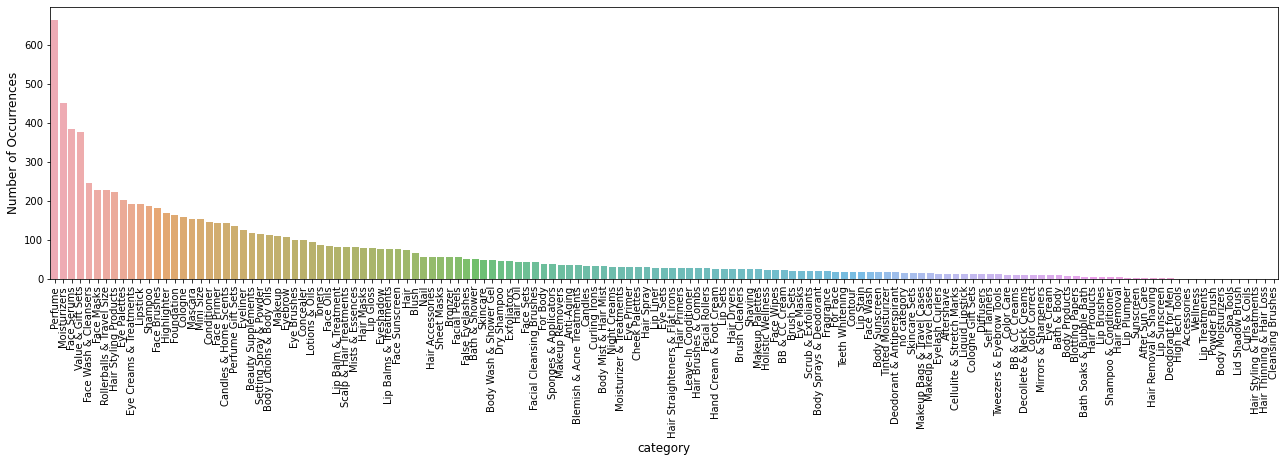

In [7]:
# let us find out the category counts in the data.
# We see the number of details per category is imbalanced.
cnt_category = df['category'].value_counts()
plt.figure(figsize=(22,5))
sns.barplot(cnt_category.index, cnt_category.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [8]:
data=df.copy()
df=data[['details','category']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['details'],df['category'], 
                                                    test_size=0.25,
                                                    random_state = 0)


In [10]:
# Let us have a copy of the data set to compare the predictions and the actual labels.
train_X=X_train.copy()
train_y=y_train.copy()
test_X=X_test.copy()
test_y=y_test.copy()

For each term in our dataset, we will calculate a measure called Term Frequency,
Inverse Document Frequency, abbreviated to tf-idf.
We will use sklearn.feature_extraction.text.TfidfVectorizer to
calculate a tf-idf vector for the details column in the data set.
sublinear_df is set to True to use a logarithmic form for frequency.
min_df is the minimum numbers of documents a word must be present in to be kept.
norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
stop_words is set to "english" to remove all common pronouns ("a", "the", ...)
to reduce the number of noisy features.

## Why SVM?

High dimensional input space:
As every different word is a feature, there would be a huge number of features.
But SVM has a remarkable property,that it is independant of dimensionality of the feature space. So SVM works well with high dimension.

Few irrelevant features:
Features with low information gain still contain some useful information and can be used to train.

Document vectors are sparse:
Every document sample only contains a small part of the whole features, 
which mean most entries of the vector are zero.

Most text categorization problems are linearly separable:
We will find in the project experiment that Linear SVM can already give a very good result which shows that at least those problems we choose can be separated linearly.

In [11]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model_svc = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)
y_pred_svc=model_svc.predict(fitted_vectorizer.transform(X_test))

In [12]:
from sklearn.metrics import accuracy_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred_svc))


Testing accuracy 0.704932343954605


# Results

## Results in the form of data frame

In [13]:
y_test_list=list(y_test)
test_X_list=list(test_X)
y_pred_list=list(y_pred_svc)
Results=pd.DataFrame({'Input':test_X_list,'Output':y_pred_list,'Actual':y_test_list})

In [14]:
Results[0:4]

,Input,Output,Actual
0,What it is: A set of two mini makeup sponges—a...,Sponges & Applicators,Sponges & Applicators
1,Which skin type is it good for?✔ Normal✔ Oily✔...,Blemish & Acne Treatments,Value & Gift Sets
2,What it is:A brush head designed to clear away...,Facial Cleansing Brushes,Facial Cleansing Brushes
3,What it is:A light and cooling gel to revive- ...,Eye Creams & Treatments,Eye Creams & Treatments


## Query a single text to make a prediction. 

In [15]:
test_X.iloc[0]

'What it is: A set of two mini makeup sponges—a triple-edged sponge for targeted coverage and a dual-edged sponge with a velvety end designed for setting. Ingredient Callouts: This product is cruelty-free.What Else You Need to Know: Cover all your blending needs. The triple-edge sponge has a tear-drop point for maximum precision in the toughest-to-reach areas. The dual-edged sponge has a slanted edge for controlled stippling- as well as an innovative velvety end made specifically for applying setting powder.This Set Contains:- Triple-Edge Sponge- Dual-Ended Sponge'

In [16]:
details_1= 'What it is: A set of two mini makeup sponges—a triple-edged sponge for targeted coverage and a dual-edged sponge with a velvety end designed for setting. Ingredient Callouts: This product is cruelty-free.What Else You Need to Know: Cover all your blending needs. The triple-edge sponge has a tear-drop point for maximum precision in the toughest-to-reach areas. The dual-edged sponge has a slanted edge for controlled stippling- as well as an innovative velvety end made specifically for applying setting powder.This Set Contains:- Triple-Edge Sponge- Dual-Ended Sponge'
print('Predicted_category :',model_svc.predict(fitted_vectorizer.transform([details_1])))
print('Actual_category :',df[df['details'] == details_1].category.values[0])

Predicted_category : ['Sponges & Applicators']
Actual_category : Sponges & Applicators


In [144]:
details_1= test_X.iloc[-3]
print('Predicted_category :',model_svc.predict(fitted_vectorizer.transform([details_1])))
print('Actual_category :',df[df['details'] == details_1].category.values[0])

Predicted_category : ['Face Serums']
Actual_category : Face Serums


In [17]:
def predictions(input_texts):
    #texts = test_X.iloc[0:3]
    text_features = fitted_vectorizer.transform(input_texts)
    predictions = model_svc.predict(text_features)
    
    for text, predicted in zip(input_texts, predictions):
        print('"{}"'.format(text))
        print(" ")
        actual=df[df['details']==text].category.values[0]
        print('Predicted Category  :  {}   Actual Category :   {}'.format(predicted,actual))        
        print("**********************************")
    return 

In [18]:
predictions(test_X[0:2])

"What it is: A set of two mini makeup sponges—a triple-edged sponge for targeted coverage and a dual-edged sponge with a velvety end designed for setting. Ingredient Callouts: This product is cruelty-free.What Else You Need to Know: Cover all your blending needs. The triple-edge sponge has a tear-drop point for maximum precision in the toughest-to-reach areas. The dual-edged sponge has a slanted edge for controlled stippling- as well as an innovative velvety end made specifically for applying setting powder.This Set Contains:- Triple-Edge Sponge- Dual-Ended Sponge"
 
Predicted Category  :  Sponges & Applicators   Actual Category :   Sponges & Applicators
**********************************
"Which skin type is it good for?✔ Normal✔ Oily✔ CombinationWhat it is:An acne-fighting duo that helps promote clean and clear skin. Solutions for:- Acne and blemishes- Oiliness- PoresIf you want to know more… This oil-free wash fights blemishes and blackheads without over-drying skin. SEBOXYL®- black 